### **K-Means Clustering**

**K-means** is one of the most basic clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.

In [2]:
# Install missing package(s)
%pip install seaborn

# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Setup and imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

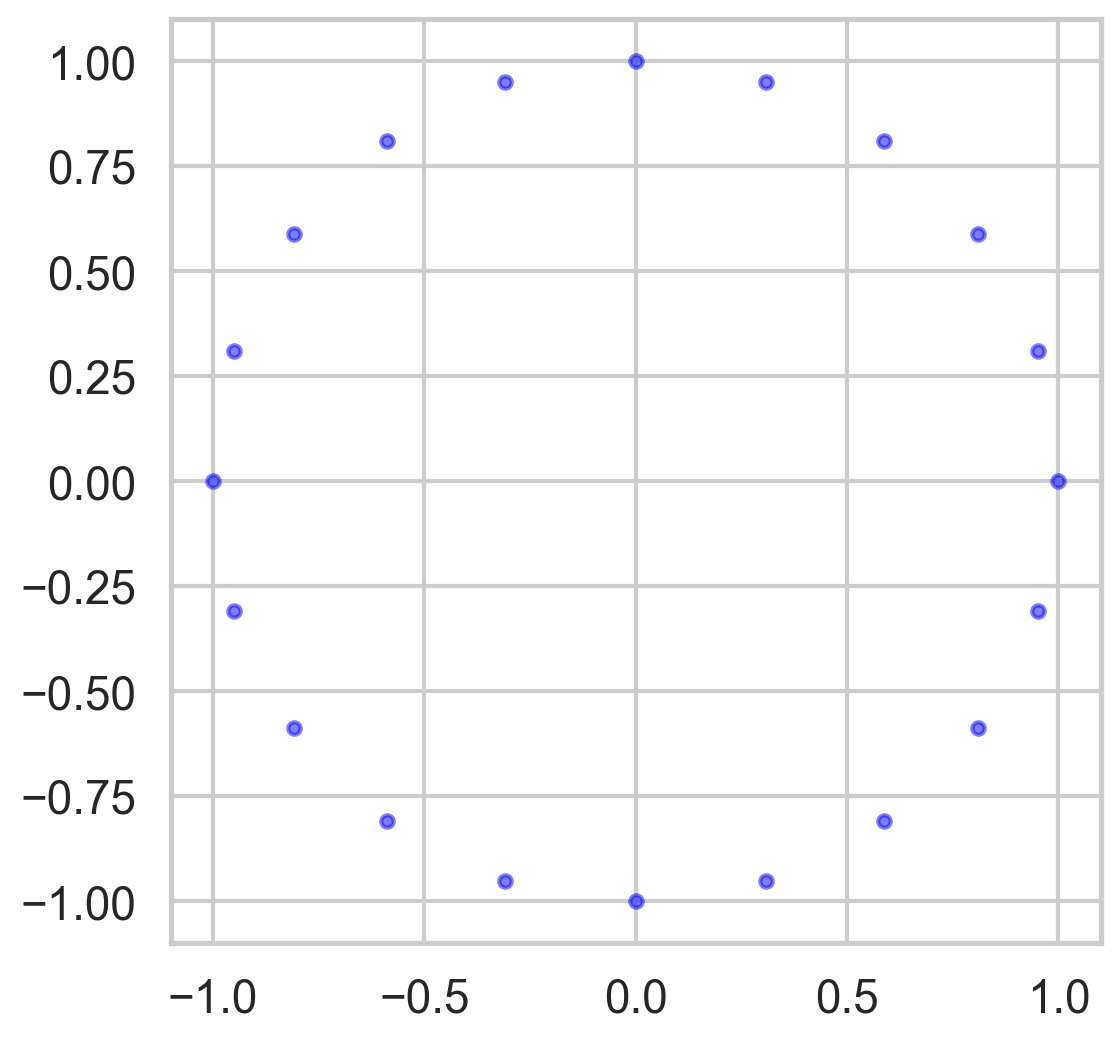

In [5]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

group this data into two clusters. We will use two different random states to initialize the algorithm. Settign a the random state variable is useful for testing and allows us to seed the randomness (so we get the same results each time).

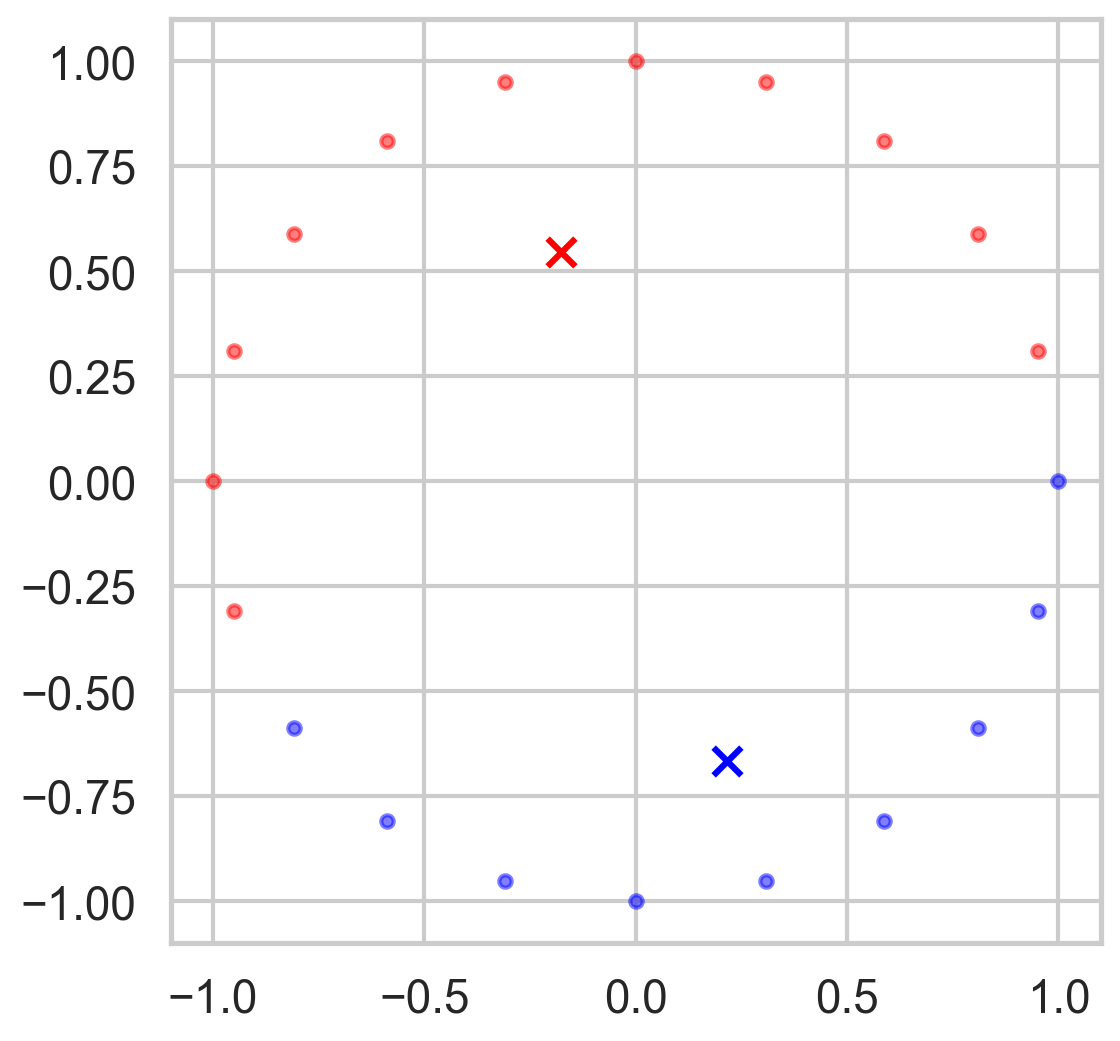

In [9]:
# Clustering with a random state of 10
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

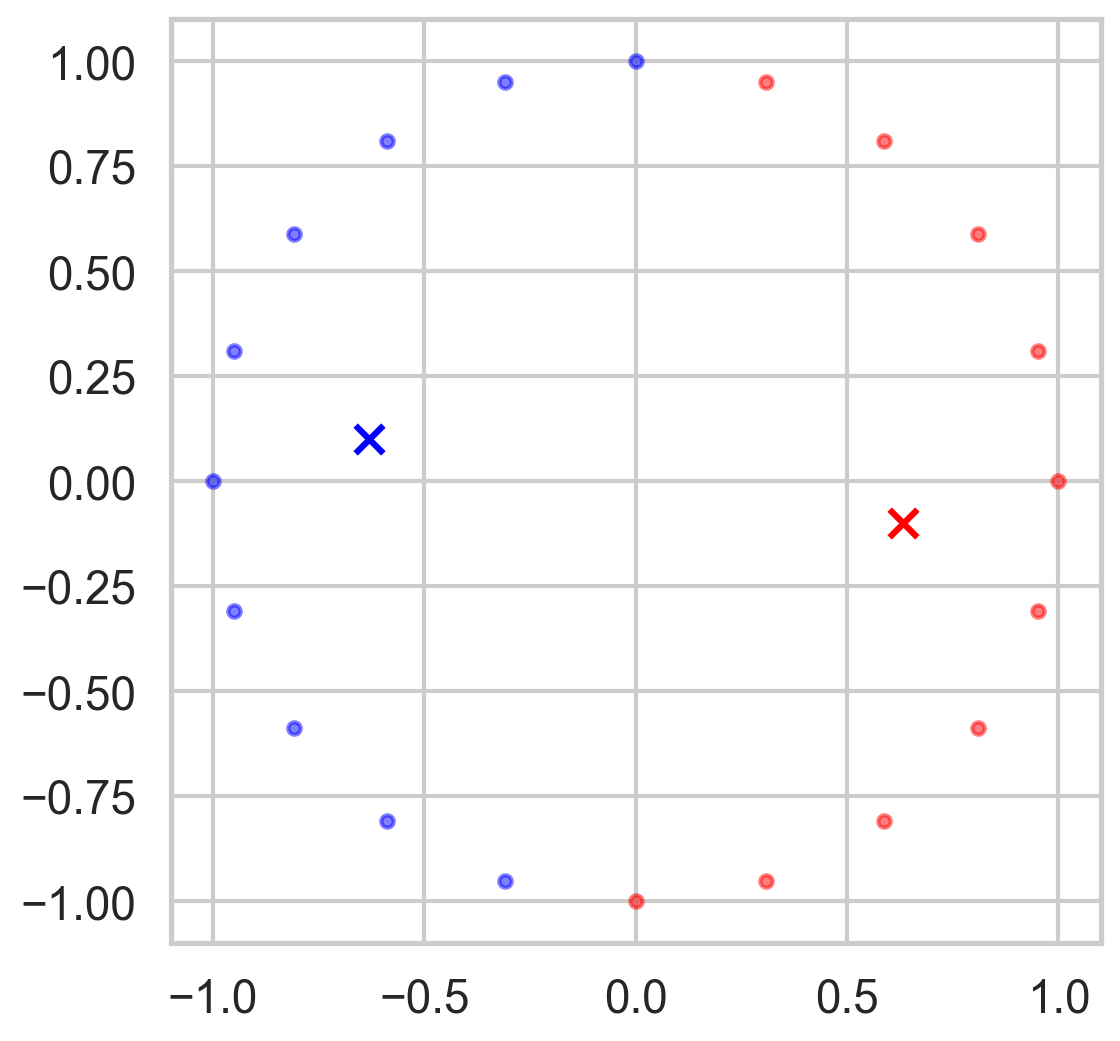

In [10]:
# Clustering with a random state of 20
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

Why are the clusters different when we run the K-means twice?

It's because the starting points of the cluster centers have an impact on where the final clusters lie. The starting point of the clusters is controlled by the random state.

### Determining optimium number of clusters

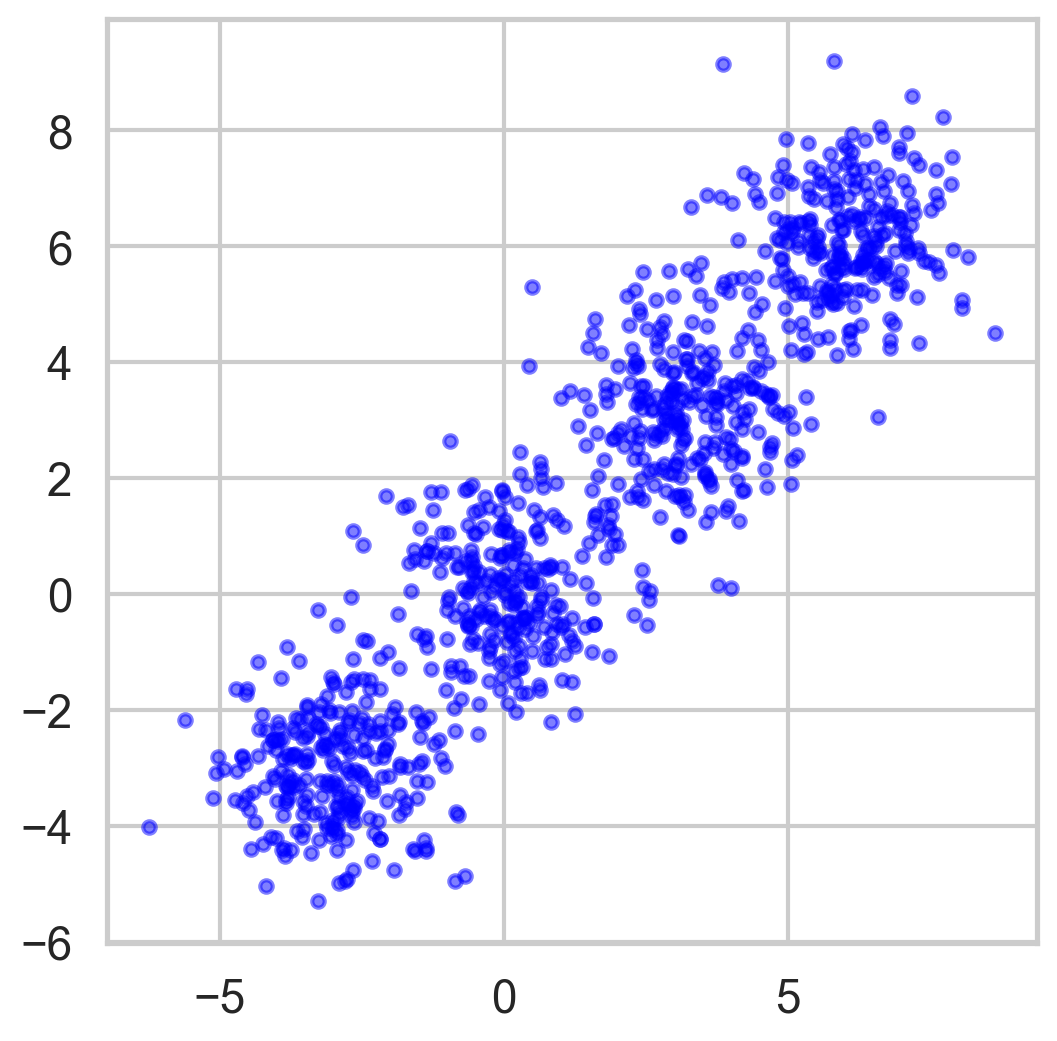

In [12]:
# create a new dataset that visually consists on a few clusters and try to group them


n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

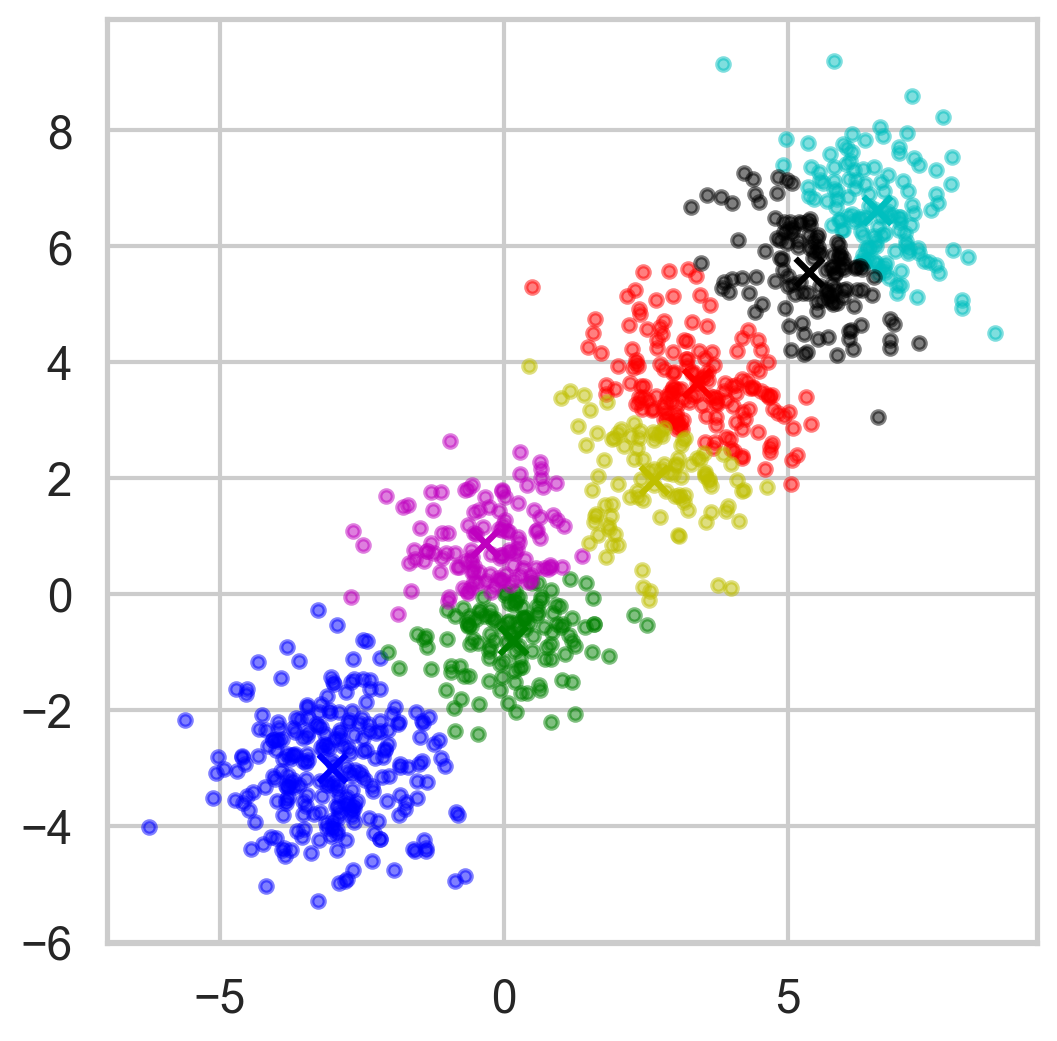

In [13]:
# Let's run K-means with seven clusters

num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

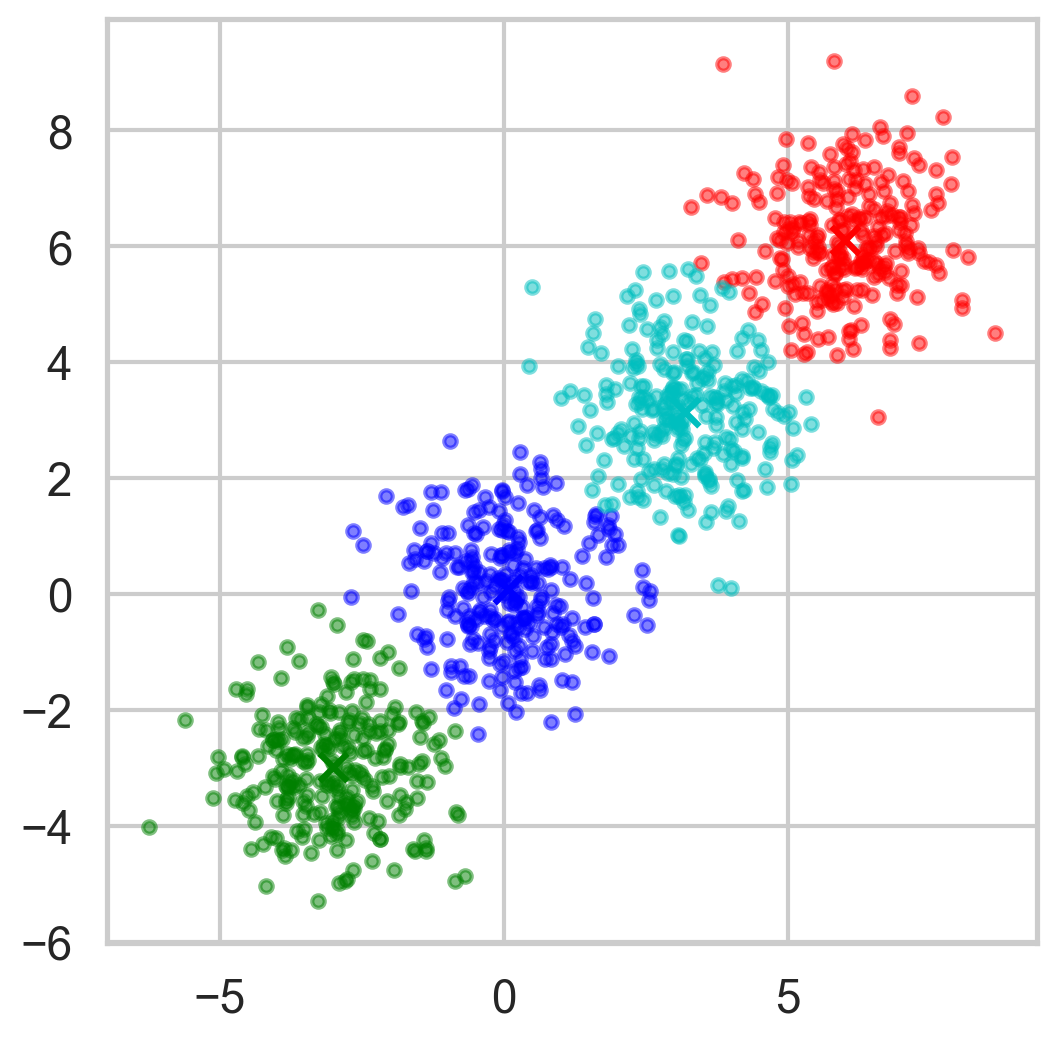

In [14]:
# let's re-run the algorithm with four clusters

num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

Should we use four or seven clusters?

* A way of solving this is to plot the inertia


In [15]:
# nertia: (sum of squared error between each point and its cluster center) as a function of the number of clusters.

km.inertia_

1880.2259336026702

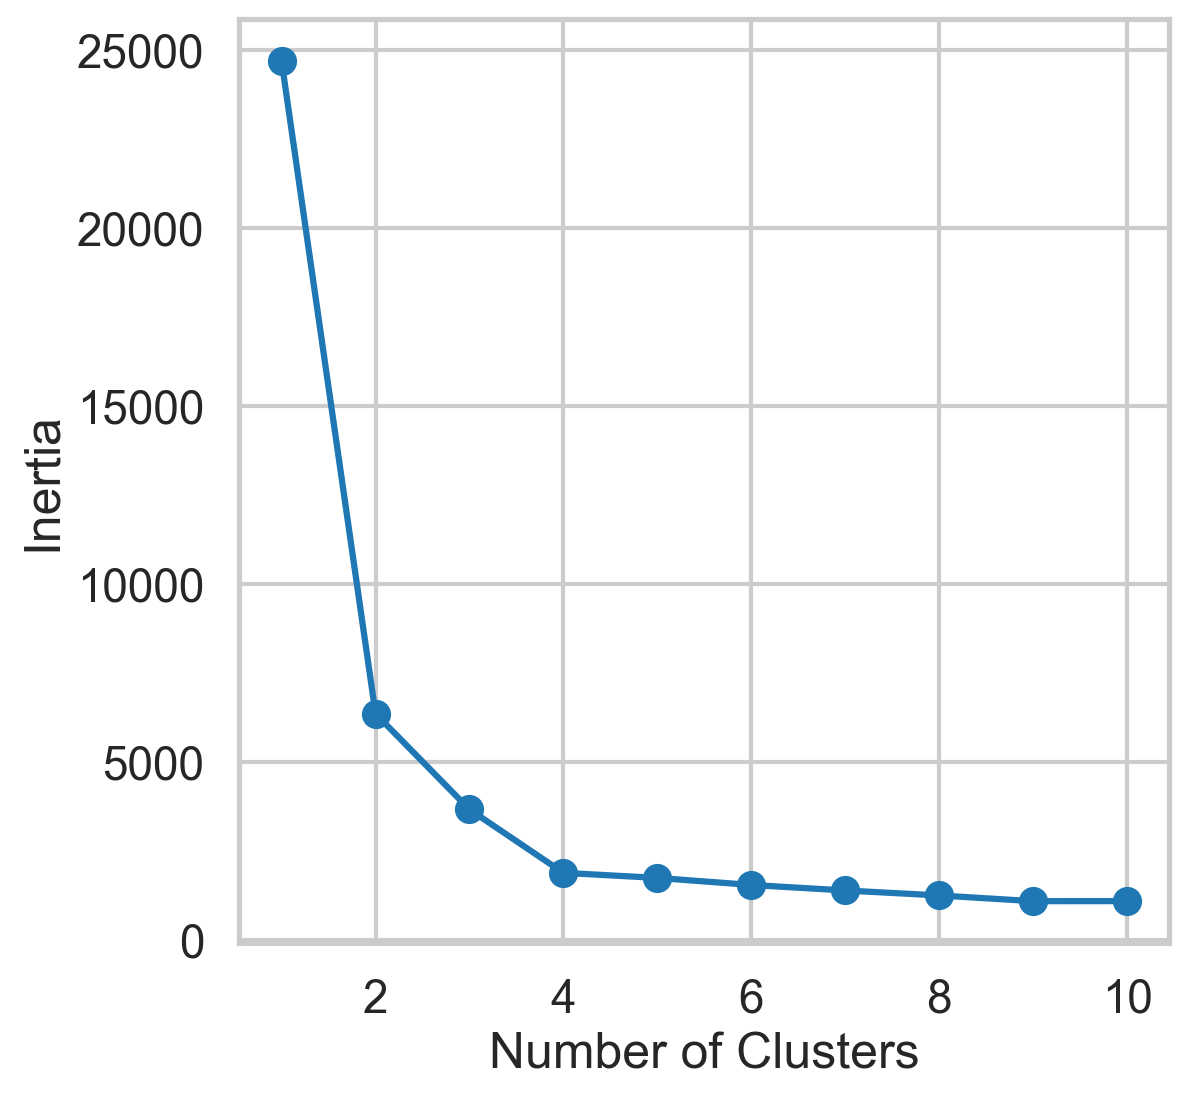

In [16]:
# Write code that calculates the inertia for 1 to 10 clusters, 
# and plot the inertia as a function of the number of clusters.

inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

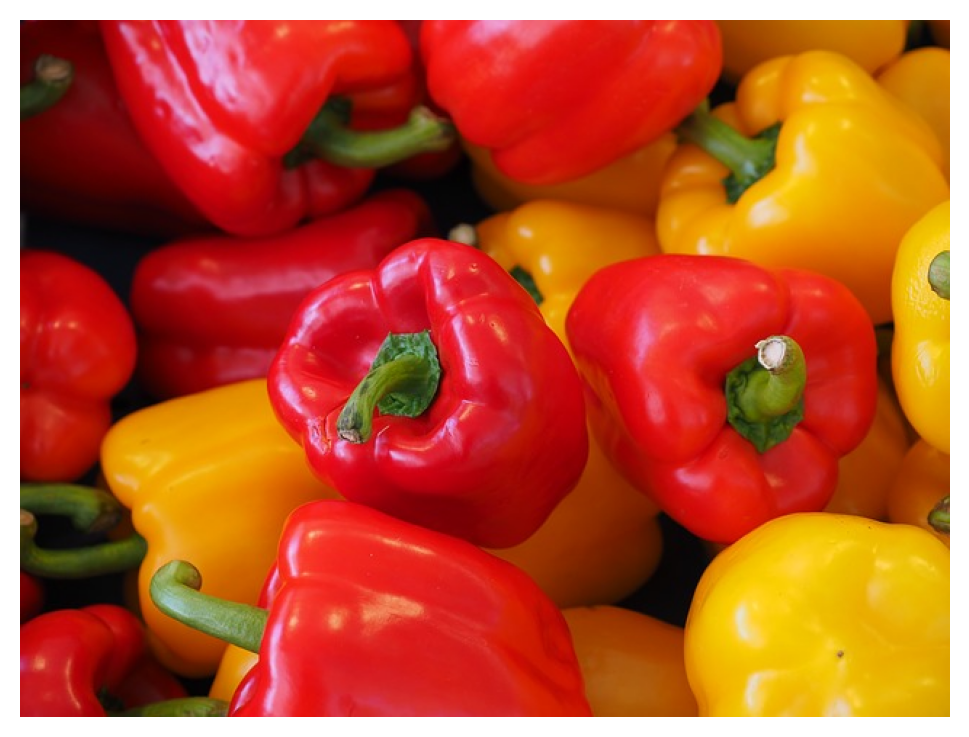

In [20]:
import urllib.request
import ssl
from PIL import Image

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/peppers.jpg'
# create an unverified SSL context to avoid certificate verification errors
context = ssl._create_unverified_context()
with urllib.request.urlopen(url, context=context) as resp:
	img = Image.open(resp)
	img = np.array(img)

plt.imshow(img)
plt.axis('off')

In [21]:
img.shape

(480, 640, 3)

The image above has 480 pixels in height and 640 pixels in width. Each pixel has 3 values that represent how much red, green and blue it has.

(np.float64(-0.5), np.float64(0.5), np.float64(0.5), np.float64(-0.5))

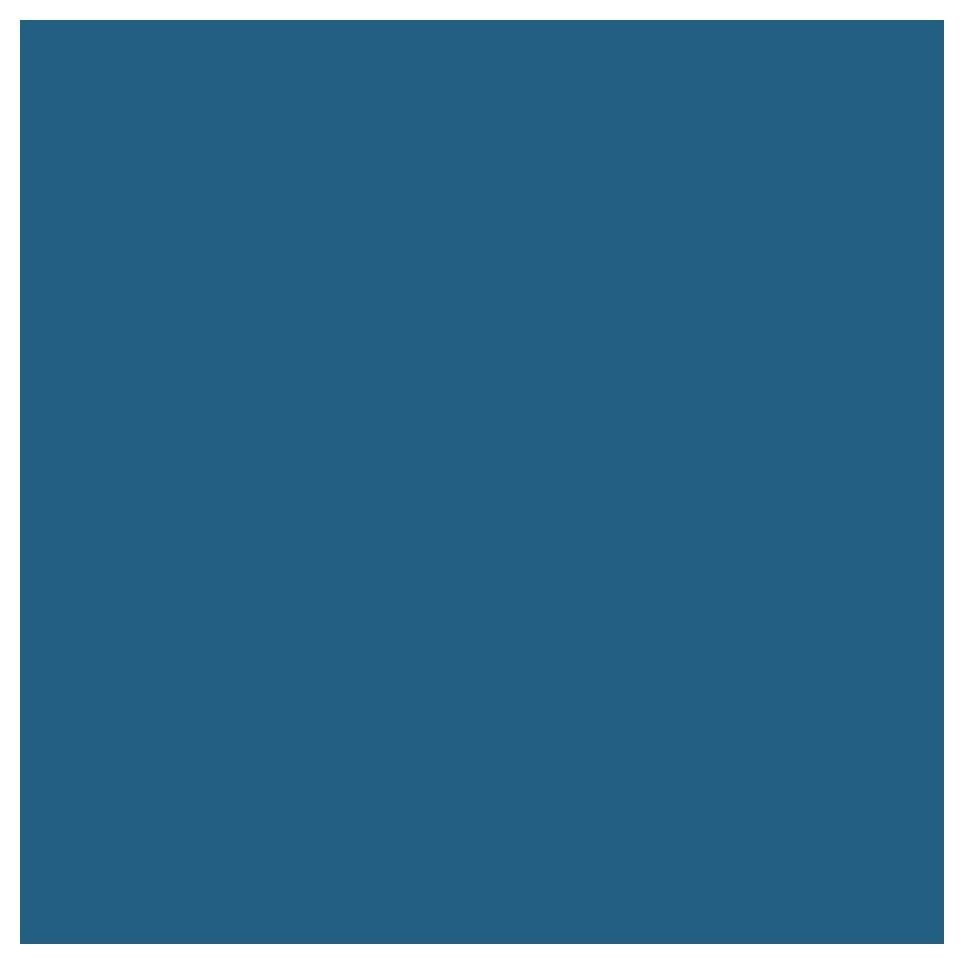

In [ ]:
# assign values for the RGB.
# Each value should be between 0 and 255
R = 35
G = 95
B = 131
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off')

In [ ]:
# we will reshape the image into a table that has a pixel per row 
# and each column represents the red, green and blue channel.

img_flat = img.reshape(-1, 3)
img_flat[:5,:]

array([[21, 16, 23],
       [28, 15, 22],
       [45, 14, 22],
       [65, 16, 22],
       [84, 14, 24]], dtype=uint8)

Since there are 480x640 pixels we get 307,200 rows

In [26]:
img_flat.shape

(307200, 3)

In [27]:
# run K-means with 8 clusters

kmeans = KMeans(n_clusters=8, random_state=0).fit(img_flat)

In [28]:
# replace each row with its closest cluster center

img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

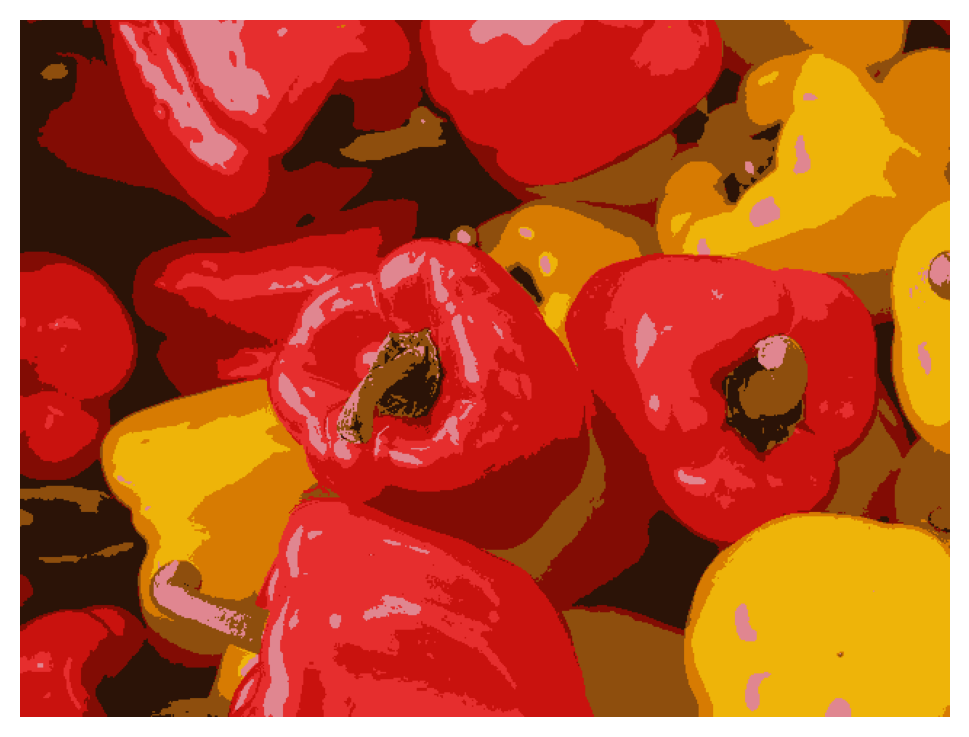

In [29]:
# reshape the data from 307,200 x 3 to 480 x 640 x 3

img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

Write a function that receives the image and number of clusters (k), and returns (1) the image quantized into k colors, and (2) the inertia.

In [30]:
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

Call the function for k between 2 and 20, and draw an inertia curve. What is the optimum number of clusters?

In [31]:
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)  

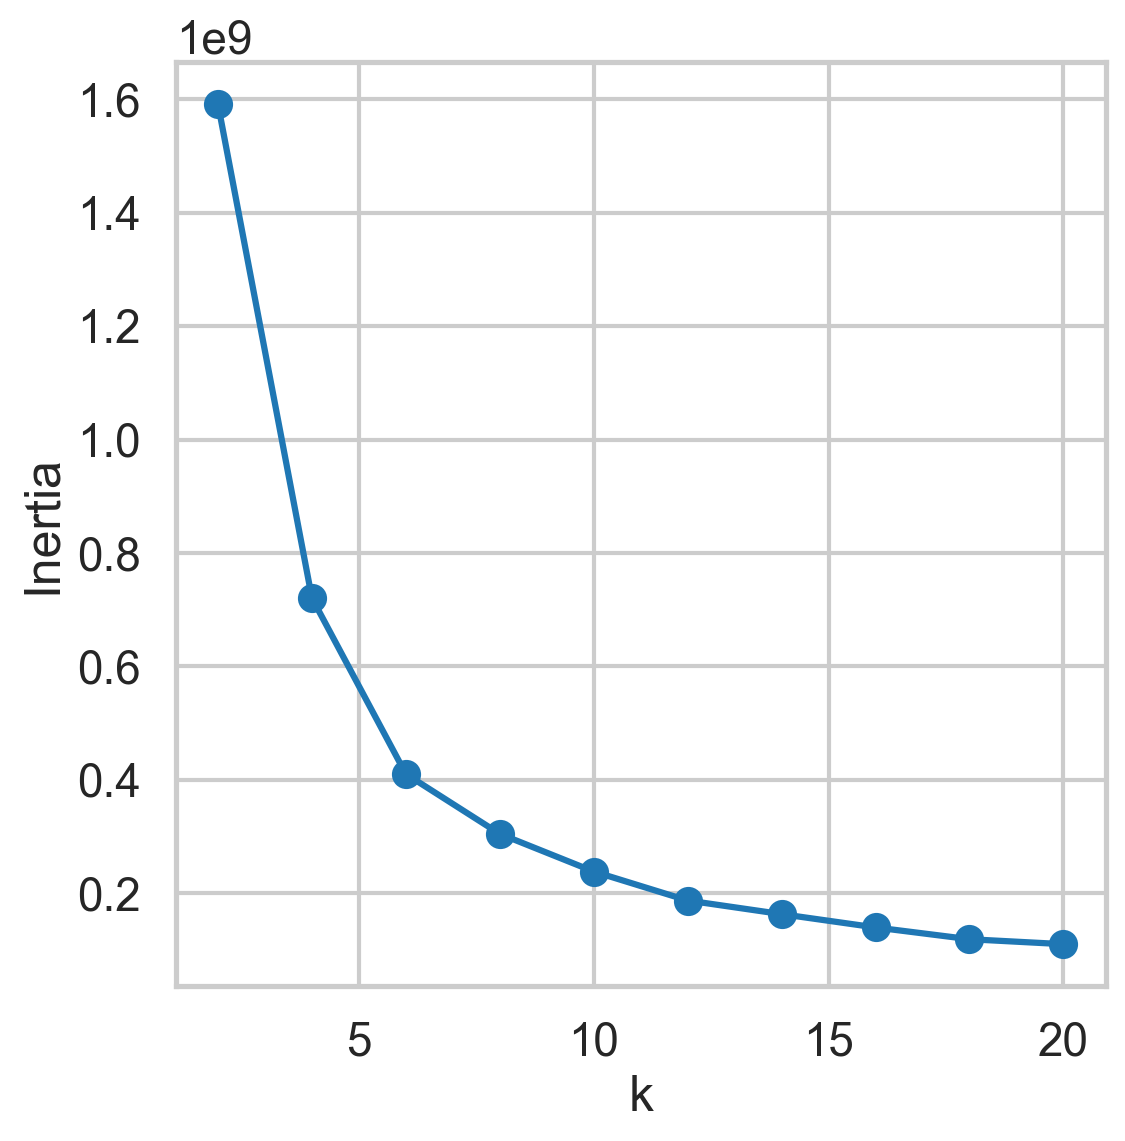

In [32]:
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');

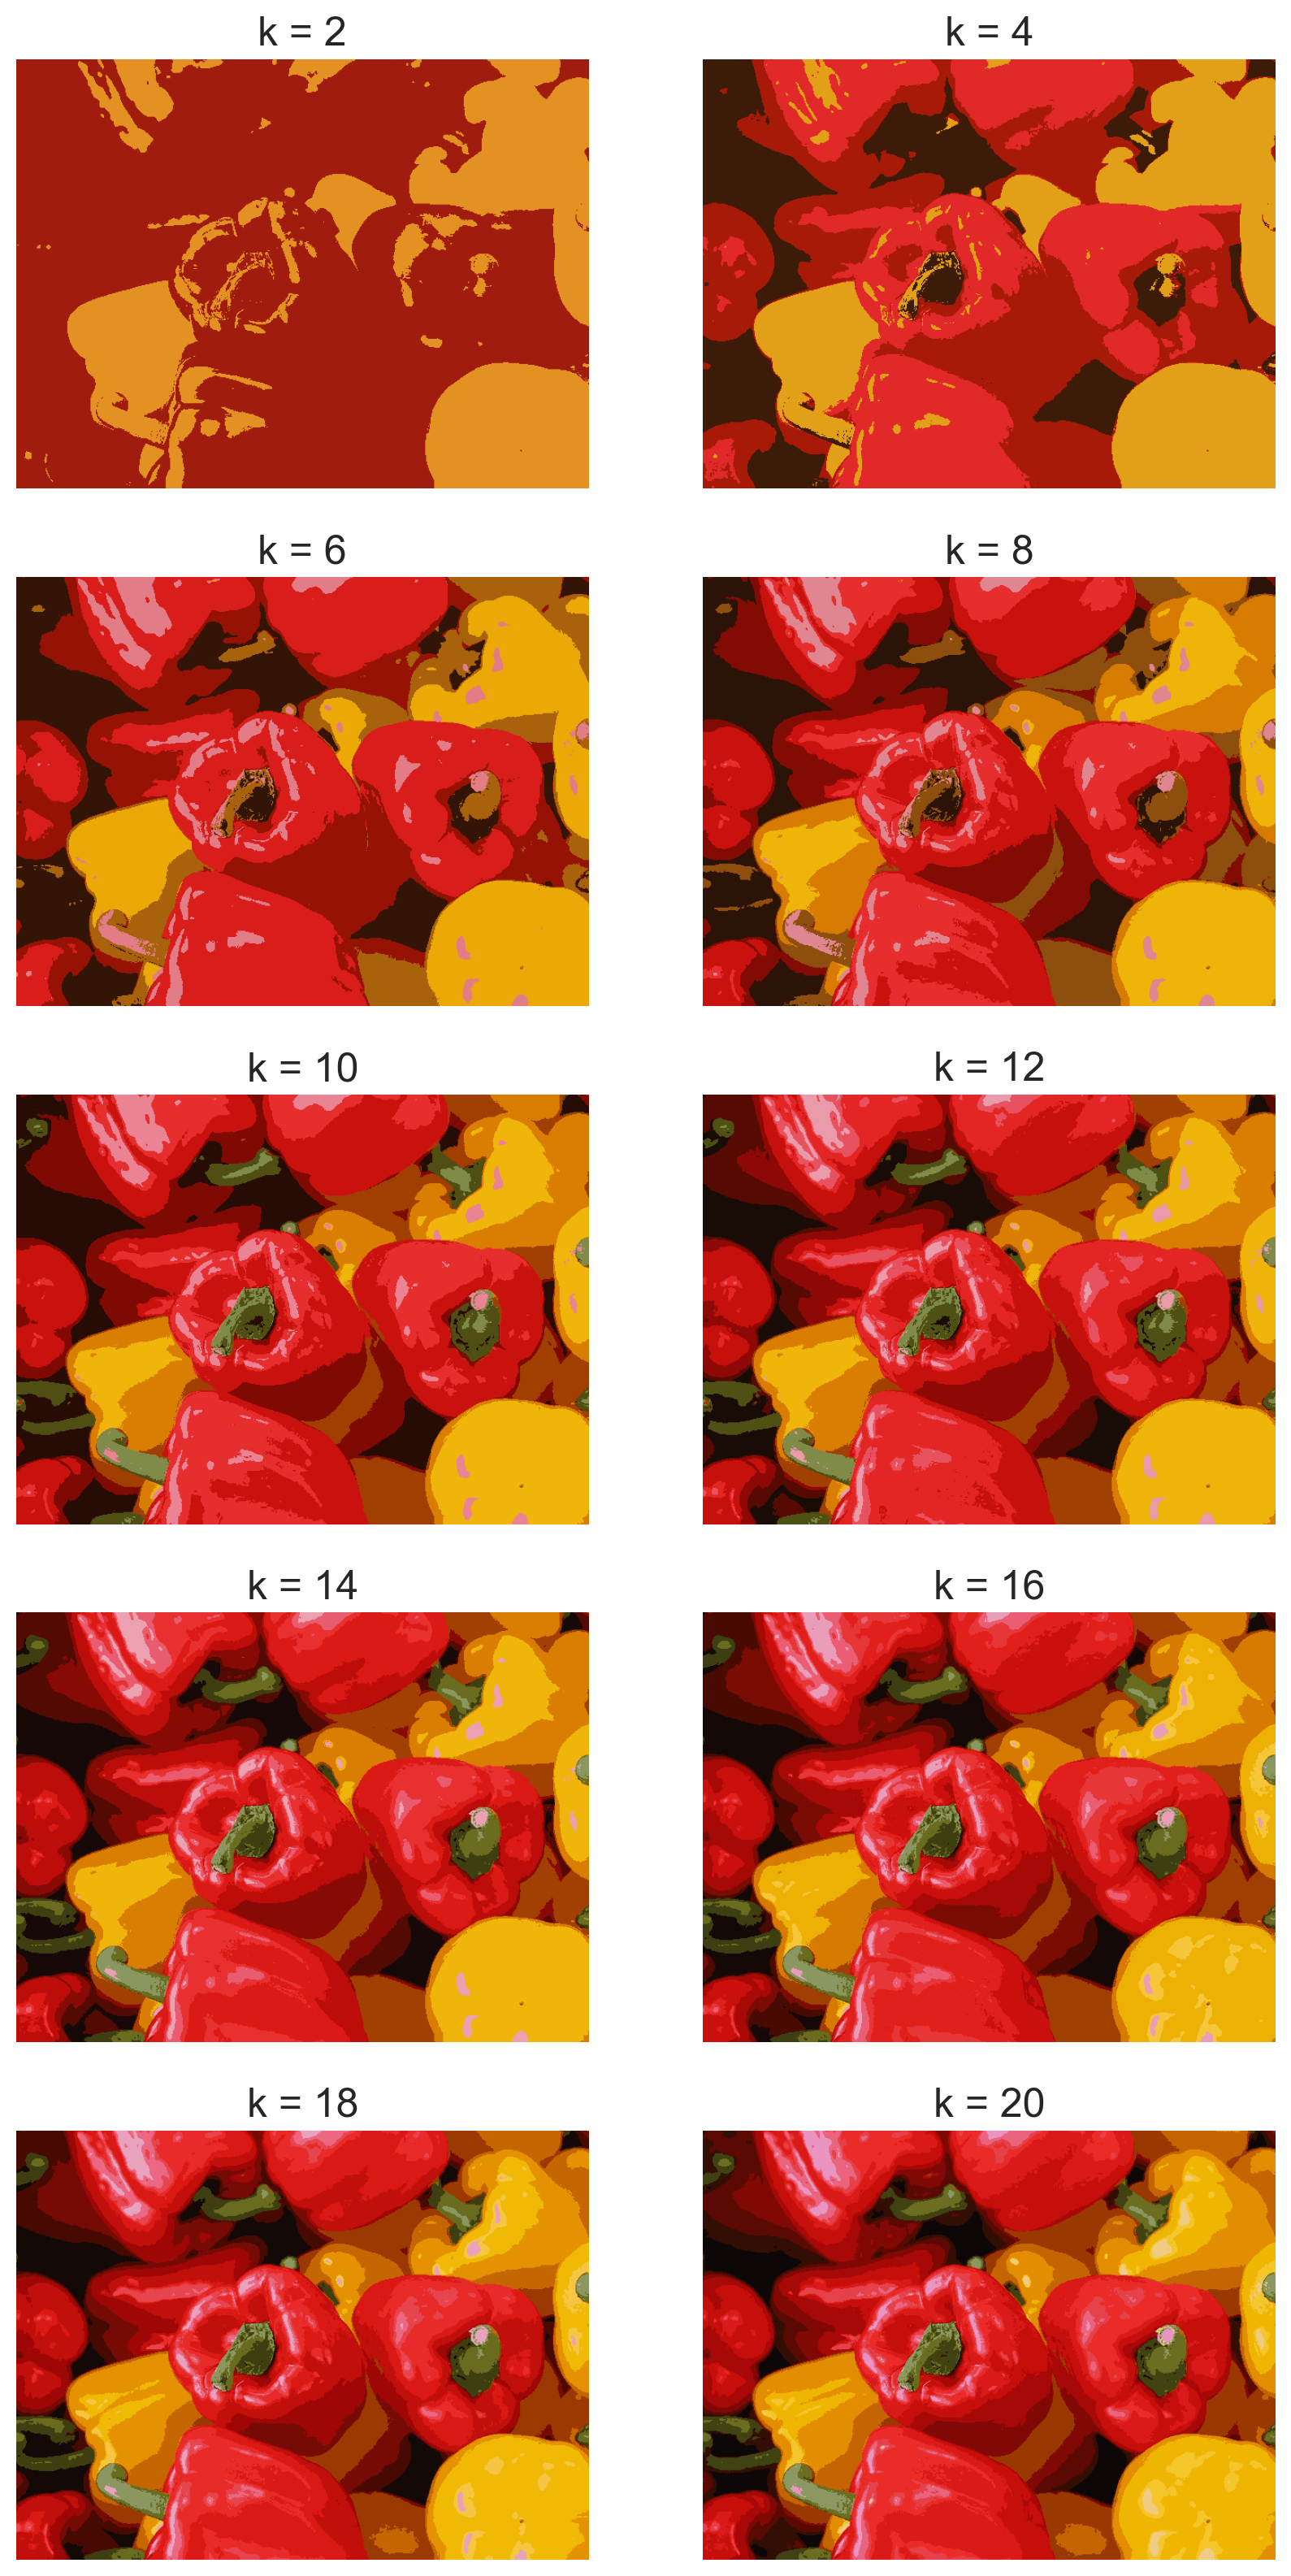

In [33]:
# Plot in a grid all the images for the different k values

plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');